# Discrete Fourier Transform & Quantum Fourier Transform

## Discrete Fourier Transform

As we know the expression for DFT is:
$$
y_k = \frac{1}{\sqrt {N}}\sum_{j=0}^{N-1} e^{\frac{i2\pi jk}{N}} \cdot x_j
$$

In [17]:
#import block
%matplotlib inline
from cmath import exp
from math import pi
from math import sqrt
from matplotlib import pyplot as plt

In [25]:
# creating a list where every 7th value is 1 and others are 0
N = 103
x = [1 if i%7==0 else 0 for i in range(N)]


In [20]:
# Calculating the DFT
coeff = 1 / (sqrt(N))
y = [0]*N

for k in range(N):
    s = 0
    for j in range(N):
        s = s + exp(2 * pi * j * k * 1j / N ) * x[j]
    y[k] = s * coeff
    
y_abs = [abs(e)for e in y]

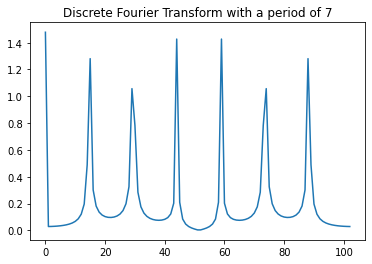

In [21]:
#Ploting the output vector y
plt.plot(y_abs)
plt.title("Discrete Fourier Transform with a period of 7")
plt.show()

In [23]:
103/7*2

29.428571428571427

## A more short, lazy and quick way to do DFT. We will use numpy.fft routine.

In [26]:
# A more short and quick way to get dft
# DFT: O(N^2)
# FFT : O(NlogN)
import numpy as np
from numpy.fft import *

In [28]:
N = 120
x = [1 if i%11==0 else 0 for i in range(N)]
y = fft(x)
y_abs = np.abs(y)

In [27]:
120/11

10.909090909090908

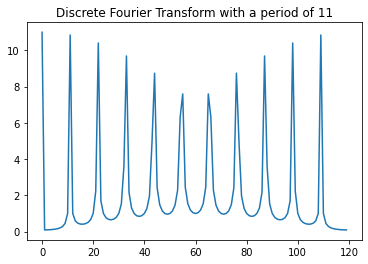

In [29]:
# Ploting the output vector
plt.plot(y_abs)
plt.title("Discrete Fourier Transform with a period of 11")
plt.show()

In [30]:
y_abs[10]

0.9999999999999998

## Quantum Fourier Transform
The expresion kinda looks same as the classical version. Say, $|x\rangle$ is a basis vector then,
$$
QFT:|x\rangle \mapsto  \frac{1}{\sqrt {N}}\sum_{k=0}^{N-1} e^{\frac{i2\pi xk}{N}}|k\rangle
$$
Where $N = 2^n$, n is the number of qubit.

<font color = "#ff661a">**Using qiskit just for clear visualization purpose.**</font>

In [ ]:
# import block
from qiskit import *
# from qiskit.visualization import *

In [ ]:
def qft_qiskit(n, qc):
    for i in range(n):
        qc.h(i)
        for k in range(i+1, n):
            phi = (2 * np.pi) / 2**(k-i+1)
            qc.cp(phi, k, i)
        qc.barrier()
    
    for i in range(n//2):
        qc.swap(i, n-i-1)

def iqft_qiskit(n, qc):
    for i in range(n//2):
        qc.swap(i, n-i-1)
    qc.barrier()
    for i in range(n-1, -1, -1):
        
        for k in range(n-1, i, -1):
            phi = -(2 * np.pi) / 2**(k-i+1)
            qc.cp(phi, k, i)
#         qc.barrier()
        
        qc.h(i)
#         qc.barrier()
    
        
    

In [ ]:
N = 4 #number of qubits
qc = QuantumCircuit(N)
qft_qiskit(N,qc)
iqft_qiskit(N, qc)
# qc.draw("latex", filename = f"qft_iqft_{N}.png")
qc.draw()
# plt.plot()
# backend = BasicAer.get_backend('statevector_simulator')
# result = execute(qc, backend).result()
# sv = result.get_statevector(qc)
# plot_bloch_multivector(sv)
# plt.show()

## QFT for 4 qubits
![QFT for 4](qft_4.png)

In [ ]:
U = ABC
U_dagger = C_dagger B_dagger A_dagger

## Inverse QFT for 5 qubits
![IQFT for 5 qubits](iqft_5.png)

## QFT-IQFT pair for 4 qubits
![QFT-IQFT pair for 4 qubits](qft_iqft_4.png)

## Generalised QFT
![Generalised QFT](qft_qiki.png)

## Implementing QFT-IQFT in cirq 

<table>
    <tr>
        <td style= "padding: 50px;background-color: #ffffff;">$$
CZPowGate(t) = \begin{bmatrix}
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & e^{i\pi t}
\end{bmatrix}$$</td>
        <td style= "padding: 50px; background-color: #ffffff;">$$P(t) = \begin{bmatrix}
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & e^{it}
\end{bmatrix}$$</td>
    </tr>
</table>

In [46]:
import cirq
from cirq.circuits import InsertStrategy
from cirq import H, SWAP, CZPowGate, X


In [41]:
def qft_cirq(n, qubits, circuit):
    
    for i in range(n):
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW )
        
        for k in range(i+1, n):
            CZ_r = CZPowGate(exponent = 2/2**(k-i+1))
            circuit.append(CZ_r(qubits[k], qubits[i]), strategy = InsertStrategy.NEW)
        
    for i in range(n//2):
        circuit.append(SWAP(qubits[i], qubits[n-i-1]), strategy = InsertStrategy.NEW)
    
    
def iqft_cirq(n, qubits, circuit):
    for i in range(n//2):
        circuit.append(SWAP(qubits[i], qubits[n-i-1]), strategy = InsertStrategy.NEW)
    
    for i in range(n-1, -1, -1):
        
        for k in range(n-1, i, -1):
            CZ_r = CZPowGate(exponent = -2/2**(k-i+1))
            circuit.append(CZ_r(qubits[k], qubits[i]), strategy = InsertStrategy.NEW)
        
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW)
        
    

In [50]:
n = 4

#creating the circuit
circuit = cirq.Circuit()

#creating the qubits
qubits_list = cirq.LineQubit.range(n)

#Init qubits
# circuit.append(X(qubits_list[0]))
# circuit.append(X(qubits_list[2]))

#Applying the qft
# qft_cirq(n, qubits_list, circuit)

# Applying cirq's inbuilt qft
circuit.append(cirq.qft(*qubits_list))

#Applying the iqft
# iqft_cirq(n, qubits_list, circuit)

print(circuit)

#Simulating the circuit to get the final state. If the qft and iqft is applied correctly
#then we will see no change in the output vector.
sim = cirq.Simulator()
result = sim.simulate(circuit)
print(result)


0: ───qft───
      │
1: ───#2────
      │
2: ───#3────
      │
3: ───#4────
measurements: (no measurements)
output vector: [0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j
 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j
 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j
 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j]


In [ ]:
H^(n)|000000>


In [51]:
1/np.sqrt(2**4)

0.25